In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/city_day.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# 1. Exploring the data

In [4]:
def getDurationOfData(data):
    print('DURATION OF DATA:\nThe data is between', data['Date'].min(), 'and' , data['Date'].max())

getDurationOfData(data)

DURATION OF DATA:
The data is between 2015-01-01 and 2020-07-01


In [5]:
def getCities(data):
    cities = data['City'].value_counts().to_frame()
    print('CITIES COVERED IN THE DATA:')
    print('Total number of cities in the dataset :', len(cities))
    cities = cities.sort_index().index
    for i in cities:
        print(i)
getCities(data)

CITIES COVERED IN THE DATA:
Total number of cities in the dataset : 26
Ahmedabad
Aizawl
Amaravati
Amritsar
Bengaluru
Bhopal
Brajrajnagar
Chandigarh
Chennai
Coimbatore
Delhi
Ernakulam
Gurugram
Guwahati
Hyderabad
Jaipur
Jorapokhar
Kochi
Kolkata
Lucknow
Mumbai
Patna
Shillong
Talcher
Thiruvananthapuram
Visakhapatnam


# 2. Merging Columns and finding Max Polluted city

In [6]:
#merging columns
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    return data

data=mergeColumns(data)

In [7]:
def subsetColumns(data):
    pollutants = ['PM2.5', 'PM10', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['City', 'AQI', 'AQI_Bucket'] + pollutants
    all_columns = ['Date'] + columns
    data = data[all_columns]
    print(data.columns)
    return data, columns, pollutants
data, columns, pollutants = subsetColumns(data)

Index(['Date', 'City', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO2', 'CO',
       'SO2', 'O3', 'BTX'],
      dtype='object')


In [8]:
data

,Date,City,AQI,AQI_Bucket,PM2.5,PM10,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,NaN,NaN,NaN,NaN,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,NaN,NaN,NaN,NaN,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,NaN,NaN,NaN,NaN,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,NaN,NaN,NaN,NaN,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,NaN,NaN,NaN,NaN,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.0,Good,15.02,50.94,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.0,Satisfactory,24.38,74.09,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.0,Satisfactory,22.91,65.73,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.0,Satisfactory,16.64,49.97,29.26,0.52,9.84,28.30,0.00


In [9]:
def max_polluted_city(pollutant, data):
    x1 = data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='coolwarm')

pm25 = max_polluted_city('PM2.5', data)
pm10 = max_polluted_city('PM10', data)
no2 = max_polluted_city('NO2', data)
so2 = max_polluted_city('SO2', data)
co = max_polluted_city('CO', data)
o3 = max_polluted_city('O3', data)
btx = max_polluted_city('BTX', data)
aqi = max_polluted_city('AQI', data)

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [11]:
display_side_by_side(pm25, pm10, no2,so2,o3, co, btx, aqi)

,City,PM2.5
0,Patna,123.500000
1,Delhi,117.200000
2,Gurugram,117.100000
3,Lucknow,109.710000
4,Ahmedabad,67.850000
5,Kolkata,64.360000
6,Jorapokhar,64.230000
7,Brajrajnagar,64.060000
8,Guwahati,63.690000
9,Talcher,61.410000


# 3. Getting Delhi Data

## a. Visualising entire Delhi data

In [12]:
delhi_data = data[data['City']=='Delhi']
delhi_data.set_index('Date',inplace=True, drop = False)

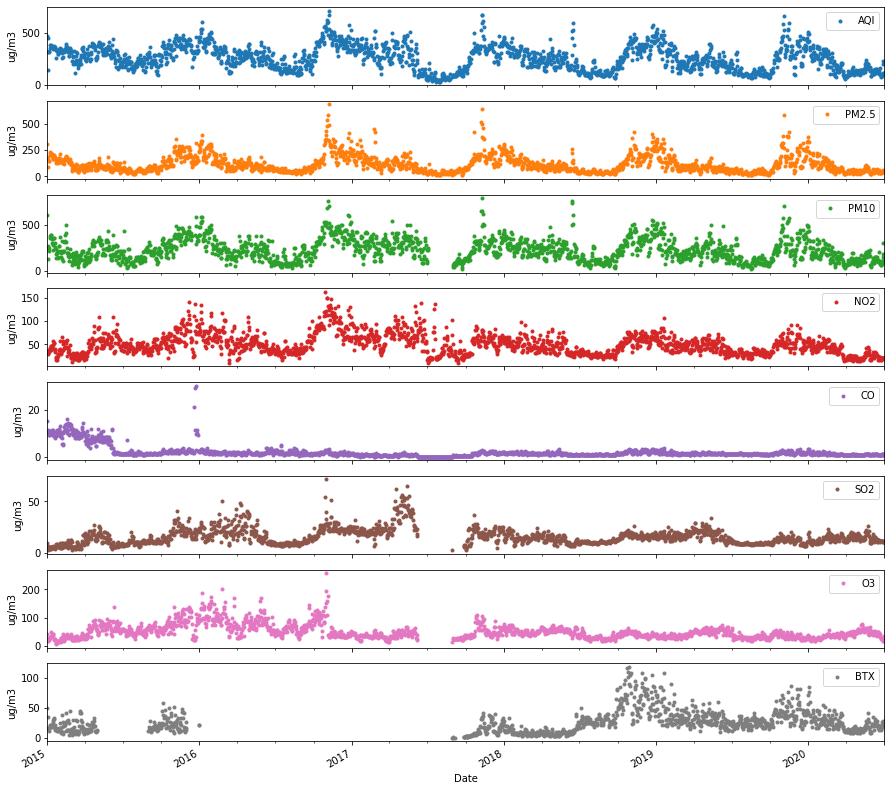

In [13]:
def getEntireDataPlot(delhi_data):
    axes = delhi_data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('ug/m3')

getEntireDataPlot(delhi_data)

## b. Visualising the amount of pollutants in air and AQI over the years and months

In [14]:
def trend_plot(delhi_data):
    delhi_data['Year'] = [d.year for d in delhi_data.Date]
    delhi_data['Month'] = [d.strftime('%b') for d in delhi_data.Date]
    years = delhi_data['Year'].unique()
    for value in pollutants:
        fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
        sns.boxplot(x='Year', y=value, data=delhi_data, ax=axes[0])
        sns.pointplot(x='Month', y=value, data=delhi_data.loc[~delhi_data.Year.isin([2015, 2020]), :])

        axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
        axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
        plt.show()

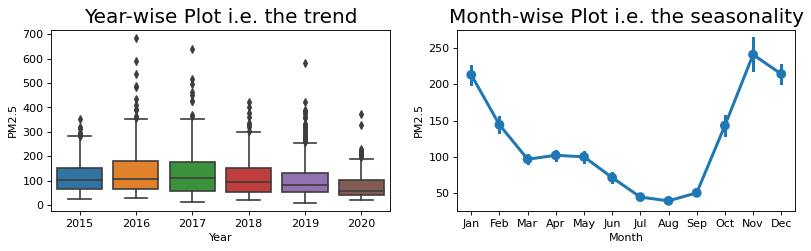

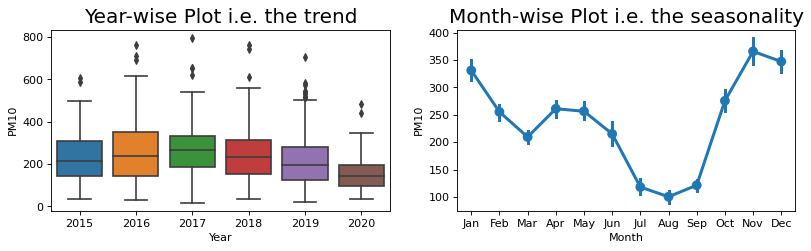

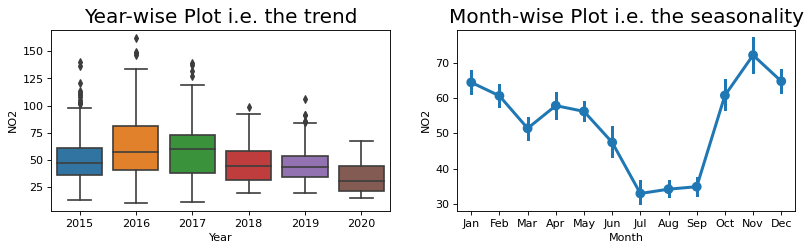

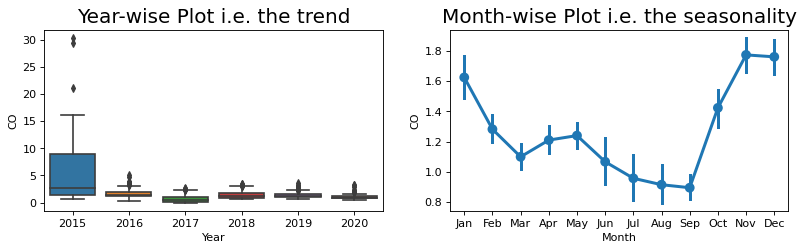

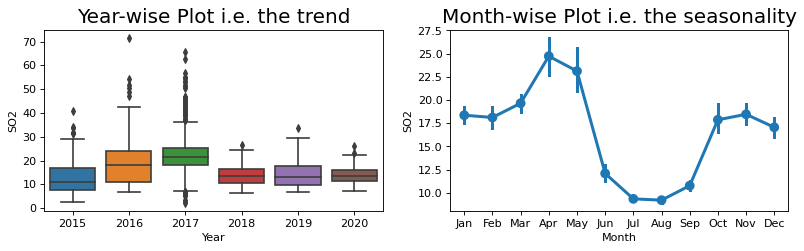

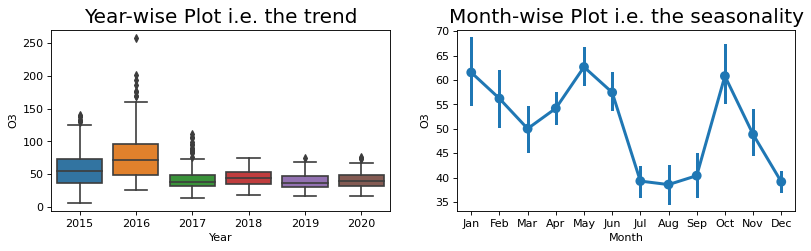

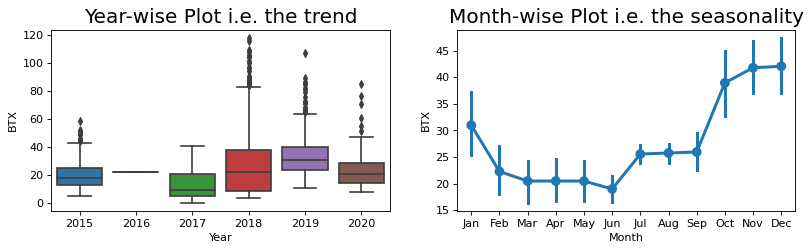

In [15]:
trend_plot(delhi_data)

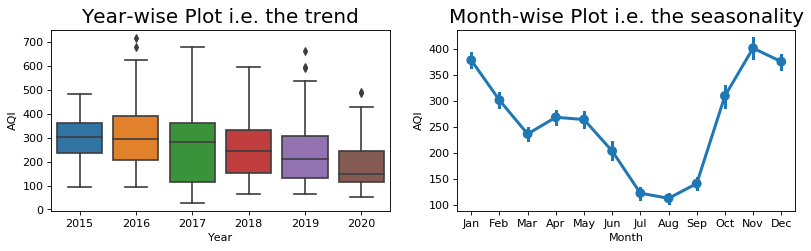

In [16]:
def getAQITrend(delhi_data):
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y='AQI', data=delhi_data, ax=axes[0])
    sns.pointplot(x='Month', y='AQI', data=delhi_data.loc[~delhi_data.Year.isin([2015, 2020]), :])

    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()

getAQITrend(delhi_data)

## c. AQI and pollutant concentrations of Delhi in last two years

In [16]:
def getColorBar(AQI_pivot):
    col = []
    for val in AQI_pivot:
        if val < 50:
            col.append('#4575b4')
        elif val > 50 and val < 101:
            col.append('#91bfdb') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('#e0f3f8')
        elif val > 200 and val < 301:
            col.append('#fee090')
        elif val > 300 and val < 401:
            col.append('#fc8d59')
        else:
            col.append('#d73027')
    return col

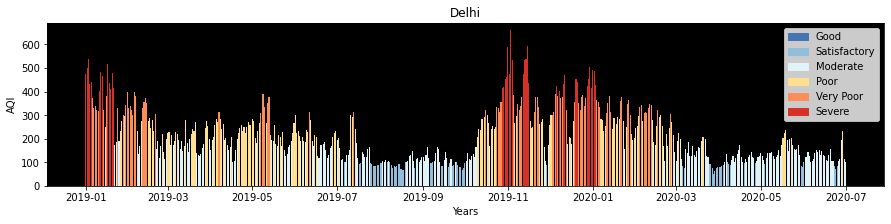

In [17]:
def getAQILastTwoYears(delhi_data):
    filtered_city_day = delhi_data[delhi_data['Date'] >= '2019-01-01']
    AQI = filtered_city_day['AQI']
    AQI.fillna(method='bfill',inplace=True)
    de = getColorBar(AQI)

    colors = {'Good':'#4575b4', 'Satisfactory':'#91bfdb', 'Moderate':'#e0f3f8', 'Poor':'#fee090', 'Very Poor':'#fc8d59', 'Severe':'#d73027'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,3))
    ax1.set_facecolor((0, 0, 0))
    ax1.bar(AQI.index, AQI, color = de, width = 0.75)
    ax1.legend(handles, labels, loc='upper right')
    ax1.title.set_text('Delhi')
    ax1.set_ylabel('AQI')
    ax1.set_xlabel('Years')
    
getAQILastTwoYears(delhi_data)

In [18]:
def getPollutantsLastTwoYears(delhi_data, cols, pollutant, safevalue, almostsafe):
    filtered_city_day = delhi_data[delhi_data['Date'] >= '2019-01-01']
    data_pollutants = filtered_city_day[cols]
    data_pollutants.fillna(method='bfill',inplace=True)
    col = []
    for val in data_pollutants[pollutant]:
        if val < safevalue:
            col.append('#4575b4')
        elif val < almostsafe:
            col.append('#fc8d59')
        else:
            col.append('#d73027')

    colors = {'Safe':'#4575b4', 'Almost Safe':'#fc8d59' ,'Not Safe':'#d73027'}        
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,3))
#     ax1.set_facecolor((0, 0, 0))
    ax1.bar(data_pollutants.index, data_pollutants[pollutant], color = col, width = 0.75)
    ax1.legend(handles, labels, loc='upper right')
    ax1.title.set_text('Delhi')
    ax1.set_ylabel(pollutant)
    ax1.set_xlabel('Years')

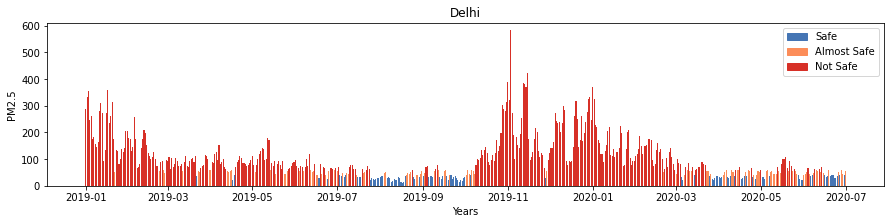

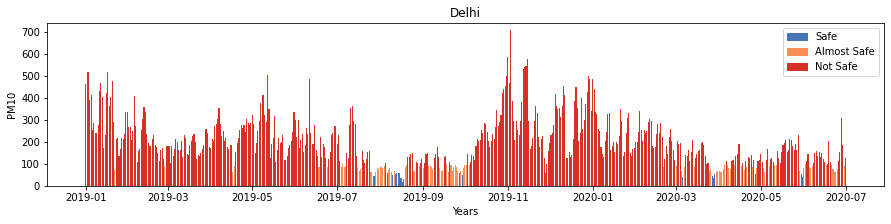

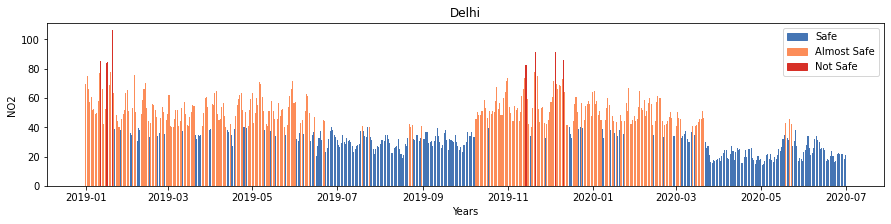

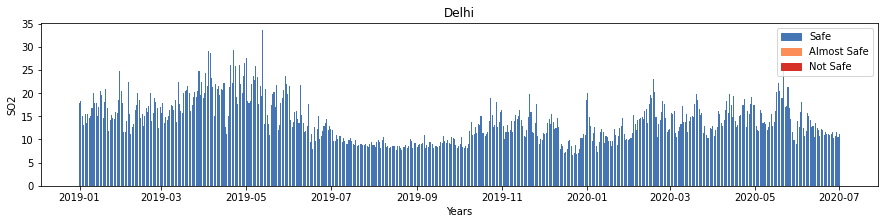

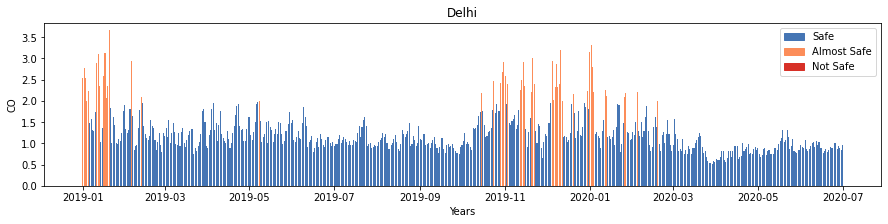

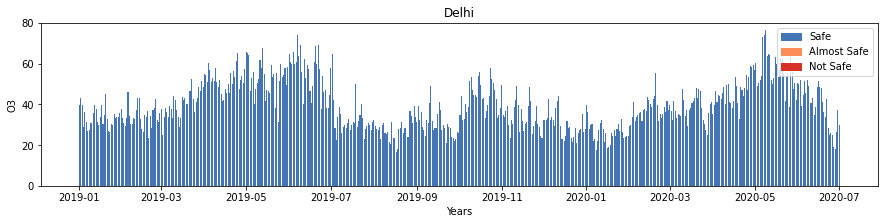

In [19]:
getPollutantsLastTwoYears(delhi_data, pollutants, 'PM2.5', 40, 60)
getPollutantsLastTwoYears(delhi_data, pollutants,'PM10', 60, 100)
getPollutantsLastTwoYears(delhi_data, pollutants,'NO2', 40, 80)
getPollutantsLastTwoYears(delhi_data, pollutants,'SO2', 50, 80)
getPollutantsLastTwoYears(delhi_data, pollutants,'CO', 2, 4)
getPollutantsLastTwoYears(delhi_data, pollutants,'O3', 100, 180)

# 4. Effect of Lockdown on AQI


## a. AQI and pollutant concentrations in the year 2020

In [21]:
def get2020Data(delhi_data):
    filtered_city_day = delhi_data[delhi_data['Date'] >= '2019-12-31']
    cols = ['Date', 'AQI'] + pollutants
    data_2020 = filtered_city_day[cols]
    data_2020 = data_2020.resample('M').mean()
    return data_2020

data_2020 = get2020Data(delhi_data)
data_2020

,AQI,PM2.5,PM10,NO2,CO,SO2,O3,BTX
Date,,,,,,,,
2019-12-31,417.000000,245.530000,338.180000,47.500000,1.800000,11.030000,28.070000,43.430000
2020-01-31,308.451613,157.112581,238.522903,47.604839,1.570323,11.366452,26.304516,36.303226
2020-02-29,262.137931,121.484138,219.875517,48.892759,1.295172,14.945172,37.457241,29.020345
2020-03-31,135.838710,57.506452,122.189032,33.779355,0.881290,14.000000,37.859355,24.441613
2020-04-30,113.000000,44.940000,104.877667,21.008333,0.780333,15.493667,46.185667,12.222333
2020-05-31,148.645161,55.448710,137.662258,24.903871,0.908387,15.425161,56.768065,16.510645
2020-06-30,125.733333,46.694667,121.209333,23.726667,0.915667,12.402000,39.616000,21.604333
2020-07-31,101.000000,54.010000,128.660000,21.050000,0.970000,11.150000,29.730000,26.250000


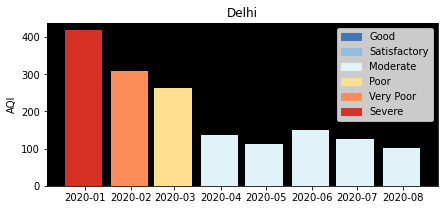

In [22]:
def getAQI2020(data_2020):
    fig, ((ax1)) =  plt.subplots(1, 1, sharex='col', sharey='row', figsize=(7,3))
    ax1.set_facecolor((0, 0, 0))
    ax1.bar(data_2020.index, data_2020['AQI'], width = 25, color=getColorBar(data_2020['AQI']))
    ax1.title.set_text('Delhi')
    ax1.set_ylabel('AQI')

    colors = {'Good':'#4575b4', 'Satisfactory':'#91bfdb', 'Moderate':'#e0f3f8', 'Poor':'#fee090', 'Very Poor':'#fc8d59', 'Severe':'#d73027'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax1.legend(handles, labels, loc='upper right')

getAQI2020(data_2020)

In [23]:
def getPollutants2020(data_2020, pollutant, safevalue, almostsafe):
    pollutant_2020 = data_2020[pollutant]
    pollutant_2020.fillna(method='bfill',inplace=True)
    col = []
    for val in pollutant_2020:
        if val < safevalue:
            col.append('#4575b4')
        elif val < almostsafe:
            col.append('#fc8d59')
        else:
            col.append('#d73027')

    colors = {'Safe':'#4575b4', 'Almost Safe':'#fc8d59' ,'Not Safe':'#d73027'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(7,3))
    ax1.bar(pollutant_2020.index, pollutant_2020, color = col, width = 25)
    ax1.legend(handles, labels, loc='upper right')
    ax1.title.set_text('Delhi')
    ax1.set_ylabel(pollutant)
    ax1.set_xlabel('Years')

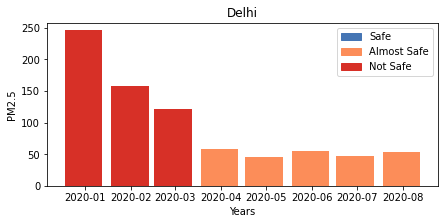

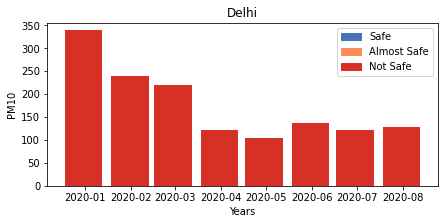

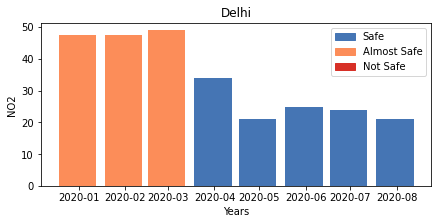

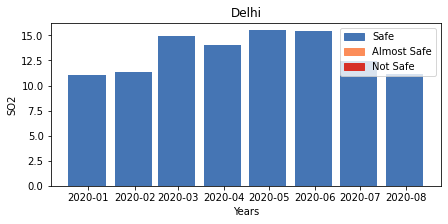

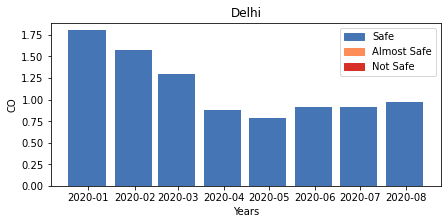

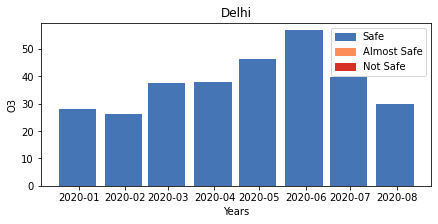

In [24]:
getPollutants2020(data_2020,'PM2.5', 40, 60)
getPollutants2020(data_2020,'PM10', 60,100)
getPollutants2020(data_2020,'NO2', 40,80)
getPollutants2020(data_2020,'SO2', 50,80)
getPollutants2020(data_2020,'CO', 2, 4)
getPollutants2020(data_2020,'O3', 100, 180)

## b. AQI and concentrations of pollutants before and after Lockdown

It'll be also interesting to see tha difference in AQI before and after the Lockdown.

> ** 📌 Points to note :** 
> * The black line shows the AQI.
> * The coloured rectangles represent the different ranges of AQI.

In [25]:
def getBulletGraph(delhi_data, pollutant, limits, colours, labels):
    data_beforeLockdown = delhi_data['2015-01-01':'2020-03-22']
    data_afterLockdown = delhi_data['2020-03-23':'2020-05-01']
    palette = sns.color_palette(colours, len(limits))
    data_before = data_beforeLockdown[pollutant].mean()
    data_after = data_afterLockdown[pollutant].mean()
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(13, 6))
    plt.subplots_adjust(hspace = 0.5)
    ax1.set_yticks([1])
    ax1.set_yticklabels([pollutant])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], data_before, color='black', height=5)

    # after lockdown
    ax2.set_yticks([1])
    ax2.set_yticklabels([pollutant])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], data_after, color='black', height=5)

    ax1.set_title('Before Lockdown')
    ax2.set_title('During Lockdown')

    rects = ax1.patches

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
          rect.get_x() + rect.get_width() / 2,
          -height * .4,
          label,
          ha='center',
          va='bottom',
          color='black')
        ax2.text(
          rect.get_x() + rect.get_width() / 2,
          -height * .4,
          label,
          ha='center',
          va='bottom',
          color='black')

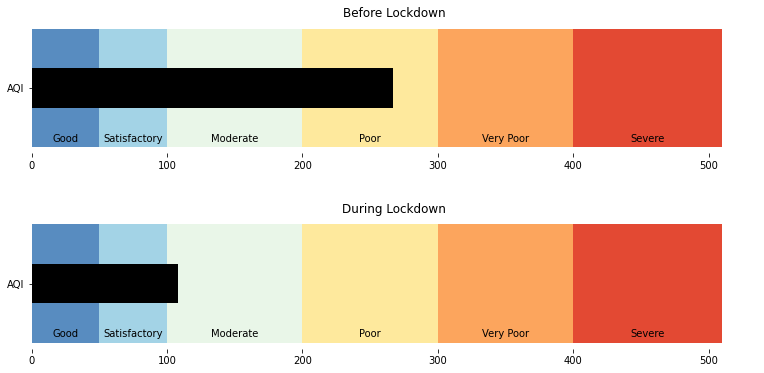

In [26]:
getBulletGraph(delhi_data, 'AQI',[50, 100, 200, 300, 400, 510],"RdYlBu_r",["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe'])

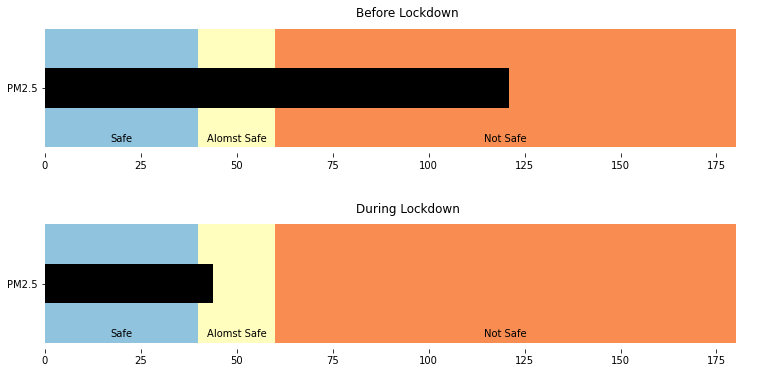

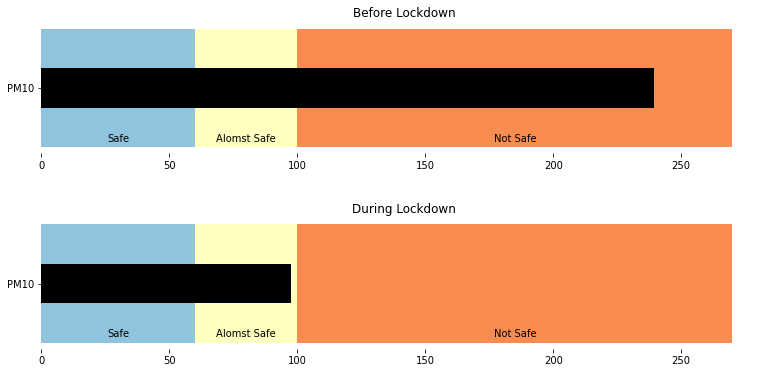

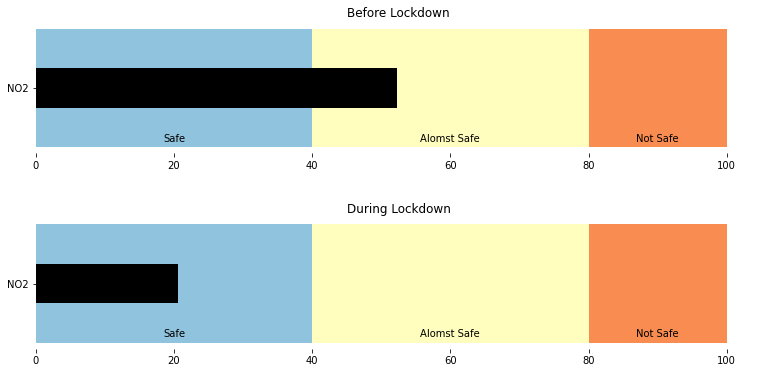

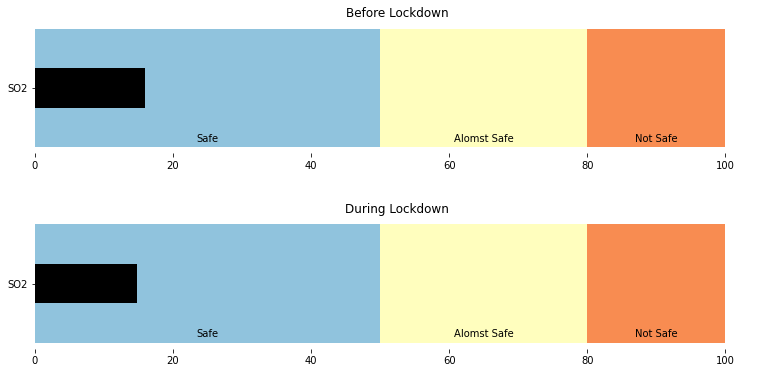

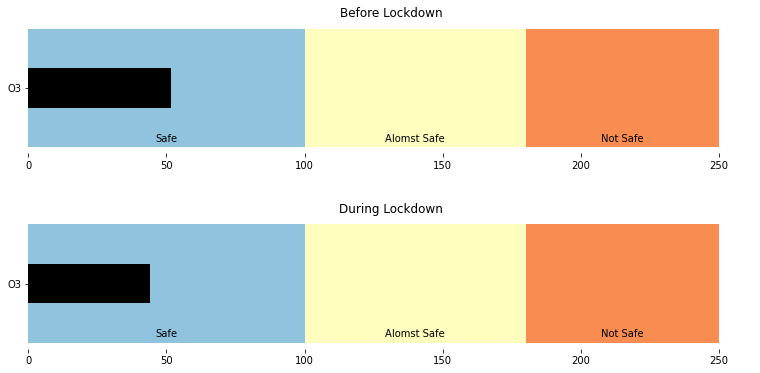

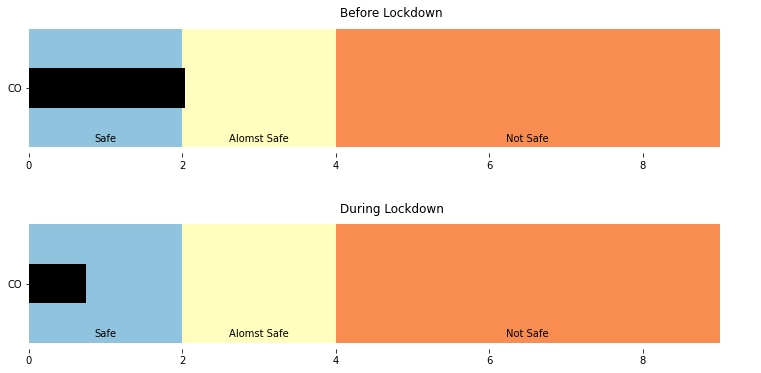

In [27]:
getBulletGraph(delhi_data, 'PM2.5', [40, 60, 180],"RdYlBu_r", ["Safe", "Alomst Safe", "Not Safe"])
getBulletGraph(delhi_data, 'PM10', [60, 100, 270],"RdYlBu_r", ["Safe", "Alomst Safe", "Not Safe"])
getBulletGraph(delhi_data, 'NO2', [40, 80, 100],"RdYlBu_r", ["Safe", "Alomst Safe", "Not Safe"])
getBulletGraph(delhi_data, 'SO2', [50, 80, 100],"RdYlBu_r", ["Safe", "Alomst Safe", "Not Safe"])
getBulletGraph(delhi_data, 'O3', [100, 180, 250],"RdYlBu_r", ["Safe", "Alomst Safe", "Not Safe"])
getBulletGraph(delhi_data, 'CO', [2,4, 9],"RdYlBu_r", ["Safe", "Alomst Safe", "Not Safe"])

# Preprocessing

### Handling Missing Values 

Filling Missing Values in Database with most frequent values

In [28]:
def getMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missin_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missin_values_array = missin_values_array.rename(columns = 
                                                     {0 : 'Missing Values', 1 : '% of Total Values'})
    missin_values_array = missin_values_array[
        missin_values_array.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return missin_values_array

In [29]:
missing_values = getMissingValues(delhi_data)
missing_values

,Missing Values,% of Total Values
BTX,781,38.9
SO2,110,5.5
O3,84,4.2
PM10,77,3.8
AQI,10,0.5
AQI_Bucket,10,0.5
PM2.5,2,0.1
NO2,2,0.1


In [30]:
delhi_data = delhi_data.fillna(delhi_data.mean(axis=0))
delhi_data

,Date,City,AQI,AQI_Bucket,PM2.5,PM10,NO2,CO,SO2,O3,BTX,Year,Month
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,Delhi,472.0,Severe,313.22,607.98,36.39,15.20,9.25,41.68,49.06,2015,Jan
2015-01-02,2015-01-02,Delhi,454.0,Severe,186.18,269.55,32.87,9.54,6.65,29.97,34.93,2015,Jan
2015-01-03,2015-01-03,Delhi,143.0,Moderate,87.18,131.90,30.31,10.61,2.65,19.71,16.13,2015,Jan
2015-01-04,2015-01-04,Delhi,319.0,Very Poor,151.84,241.84,36.91,11.54,4.63,25.36,17.31,2015,Jan
2015-01-05,2015-01-05,Delhi,325.0,Very Poor,146.60,219.13,34.92,9.20,3.33,23.20,11.97,2015,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,2020-06-27,Delhi,112.0,Moderate,39.80,155.94,21.46,0.87,10.38,18.88,22.11,2020,Jun
2020-06-28,2020-06-28,Delhi,196.0,Moderate,59.52,308.65,21.60,0.94,10.70,18.05,28.58,2020,Jun
2020-06-29,2020-06-29,Delhi,233.0,Poor,44.86,184.12,21.57,0.88,11.58,26.61,27.06,2020,Jun


In [31]:
val = 'PM10'
final_data = pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'), columns = [val])
final_data[val] = delhi_data[val]
final_data=final_data.astype('float64')
final_data[val] = final_data[val].fillna(final_data[val].mean(axis=0))

In [32]:
seasonal_data = final_data
seasonal_data = seasonal_data.resample(rule='MS').mean()
seasonal_data

,PM10
2015-01-01,276.971290
2015-02-01,234.939643
2015-03-01,135.044516
2015-04-01,187.991333
2015-05-01,271.050645
...,...
2020-03-01,122.189032
2020-04-01,104.877667
2020-05-01,137.662258
2020-06-01,121.209333


## Seasonal decomposition

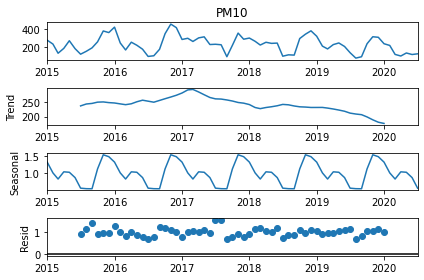

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_AQI = seasonal_data[val]
result = seasonal_decompose(Delhi_AQI, model='multiplicative')
result.plot();
# Delhi_AQI

In [34]:
# Forecasting: 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;

In [35]:
auto_arima(y=Delhi_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 2, 12))

In [36]:
#dividing into train and test:
train = Delhi_AQI[:41] #from 2015-2018
test = Delhi_AQI[42:54]# july 2018-june 2019

In [37]:
test

2018-07-01    102.670645
2018-08-01    117.762903
2018-09-01    114.685333
2018-10-01    295.134516
2018-11-01    342.432000
2018-12-01    378.942903
2019-01-01    320.044839
2019-02-01    212.379643
2019-03-01    181.935484
2019-04-01    229.141333
2019-05-01    246.818387
2019-06-01    208.546667
Freq: MS, Name: PM10, dtype: float64

In [38]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               PM10   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -221.492
Date:                            Sat, 01 May 2021   AIC                            452.984
Time:                                    11:06:09   BIC                            461.429
Sample:                                01-01-2015   HQIC                           456.038
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5656      0.163      3.463      0.001       0.246       0.886
ma.L1         -0.9989      1.127     -0.886      0.375      -3.207       1.210
ar.S.L12       0.9953      0.384      2.591      0.010       0.242       1.748
ma.S.L12      -0.8959      4.083     -0.219      0.826      -8.899       7.107
sigma2      2452.9835   7267.266      0.338      0.736   -1.18e+04    1.67e+04
===================================================================================
Ljung-Box (Q):                       29.33   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.87   Prob(JB):                         0.79
Heteroskedasticity (H):               0.68   Skew:                            -0.27
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# #predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

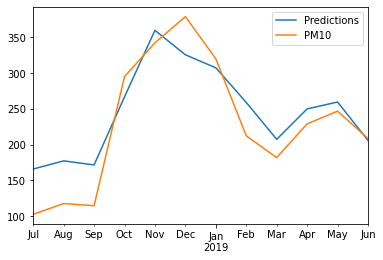

In [48]:
# #Plotting predicted values with the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [49]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)

Root Mean Squared Error:  39.106712968850374
Mean AQI: 229.20788780081924
Bias: -17.198707


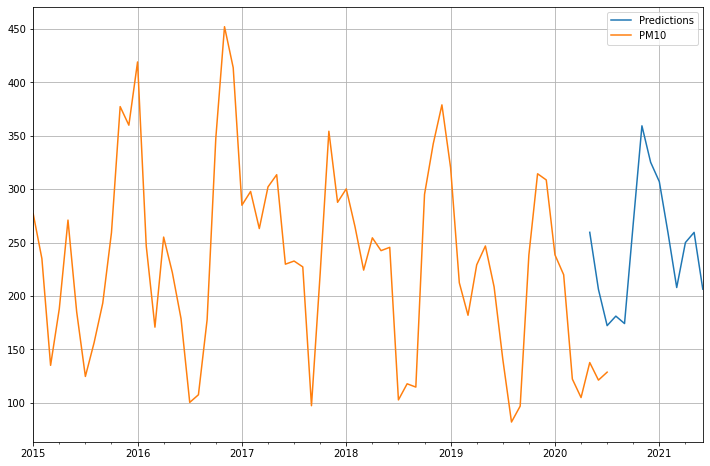

In [50]:
# Forming the model:
final_model = SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Delhi_AQI.plot(legend=True,figsize=(12,8),grid=True);